In [6]:
import os
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data Files
files = [
    "DataFiles\\Salad.txt",
    "DataFiles\\Sides.txt",
    "DataFiles\\Drinks.txt",
    "DataFiles\\Desserts.txt",
    "DataFiles\\Breakfast and Brunch.txt",
    "DataFiles\\Bread.txt"
]

# Load and process data
recipes = []
categories = []

for file in files:
    category = os.path.splitext(os.path.basename(file))[0]  # Extract category from filename
    with open(file, "r") as f:
        text = f.read()
        # Extract individual recipes from the text
        recipe_entries = re.findall(r"\[(.*?)\]", text, re.DOTALL)
        for recipe_entry in recipe_entries:
            recipe_body = recipe_entry.strip()
            recipes.append(recipe_body)
            categories.append(category)

# TF-IDF Vectorization
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(recipes)

# Function to Filter Recipes Based on Allergies
def filter_recipes_by_allergy(allergies):
    """
    Removes recipes containing any allergenic ingredients.
    """
    filtered_recipes = []
    filtered_categories = []
    for i, recipe in enumerate(recipes):
        if not any(allergy.lower() in recipe.lower() for allergy in allergies):
            filtered_recipes.append(recipe)
            filtered_categories.append(categories[i])
    return filtered_recipes, filtered_categories

# Recommendation Function
def recommend_recipe(query, allergies, top_n=5):
    """
    Recommend recipes based on the query, excluding those with allergic ingredients.
    """
    # Filter recipes based on allergies
    filtered_recipes, filtered_categories = filter_recipes_by_allergy(allergies)
    if not filtered_recipes:
        return "No recipes available matching your preferences."

    # Recompute TF-IDF for filtered recipes
    filtered_tfidf_matrix = tfidf.fit_transform(filtered_recipes)

    # Compute similarities
    query_vector = tfidf.transform([query])
    similarities = cosine_similarity(query_vector, filtered_tfidf_matrix).flatten()

    # Get top recommendations
    recommendations = sorted(enumerate(similarities), key=lambda x: -x[1])[:top_n]
    categorized_recommendations = {}
    for i, similarity in recommendations:
        category = filtered_categories[i]
        recipe = filtered_recipes[i]
        if category not in categorized_recommendations:
            categorized_recommendations[category] = []
        categorized_recommendations[category].append((recipe, similarity))  # Include similarity score

    return categorized_recommendations

# User Input for Allergies
allergies = input("Enter ingredients you are allergic to (comma-separated): ").split(",")
allergies = [allergy.strip() for allergy in allergies]
print("allergies:   ",allergies)
# User Query
query = input("Enter a keyword or ingredient you want to explore: ")
print("query:   ",query)
# Generate Recommendations
recommendations = recommend_recipe(query, allergies)

# Output Recommendations
print("\nRecommendations:")
if isinstance(recommendations, str):
    print(recommendations)
else:
    for category, recipes_with_similarity in recommendations.items():
        print(f"\nCategory: {category}")
        for recipe, similarity in recipes_with_similarity:
            print(f"- Recipe:\n{recipe}\n  Similarity Score: {similarity:.2f}\n")


allergies:    ['soya']
query:    milk,flor

Recommendations:

Category: Desserts
- Recipe:
3/4 cup white sugar
 3/4 cup whole milk
 1 cup coconut milk
 1/2 (12 fluid ounce) can evaporated milk
 1/2 (14 ounce) can sweetened condensed milk
 1/2 teaspoon vanilla extract
 3 eggs
  Similarity Score: 0.51

- Recipe:
6 eggs
 1 (14 ounce) can sweetened condensed milk
 1 (12 fluid ounce) can evaporated milk
 1 (15 ounce) can coconut milk
 1 1/2 cups whole milk
 1 teaspoon vanilla extract
 1 cup white sugar
  Similarity Score: 0.46

- Recipe:
4 eggs
 2 1/2 cups white sugar
 1/2 teaspoon salt
 6 cups milk
 3 cups evaporated milk
 2 tablespoons vanilla extract
 1 cup water
  Similarity Score: 0.45

- Recipe:
1 1/2 cups white sugar
 1 (14 ounce) can sweetened condensed milk
 1 (12 fluid ounce) can evaporated milk
 1/2 cup milk
 6 eggs
 1/2 cup fresh shredded coconut
  Similarity Score: 0.41


Category: Breakfast and Brunch
- Recipe:
1 cup all-purpose flour
 1 egg
 2 cups milk
  Similarity Score: 0.

In [2]:
import os
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data Files
files = [
    "DataFiles\\Salad.txt",
    "DataFiles\\Sides.txt",
    "DataFiles\\Drinks.txt",
    "DataFiles\\Desserts.txt",
    "DataFiles\\Breakfast and Brunch.txt",
    "DataFiles\\Bread.txt"
]

# Load and process data
recipes = []
categories = []

for file in files:
    category = os.path.splitext(os.path.basename(file))[0]  # Extract category from filename
    with open(file, "r") as f:
        text = f.read()
        # Extract individual recipes from the text
        recipe_entries = re.findall(r"\[(.*?)\]", text, re.DOTALL)
        for recipe_entry in recipe_entries:
            recipe_body = recipe_entry.strip()
            recipes.append(recipe_body)
            categories.append(category)

# TF-IDF Vectorization
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(recipes)

# Function to Filter Recipes Based on Allergies
def filter_recipes_by_allergy(allergies):
    """
    Removes recipes containing any allergenic ingredients.
    """
    filtered_recipes = []
    filtered_categories = []
    for i, recipe in enumerate(recipes):
        if not any(allergy.lower() in recipe.lower() for allergy in allergies):
            filtered_recipes.append(recipe)
            filtered_categories.append(categories[i])
    return filtered_recipes, filtered_categories

# Recommendation Function
def recommend_recipe(query, allergies, top_n=5):
    """
    Recommend recipes based on the query, excluding those with allergic ingredients.
    """
    # Filter recipes based on allergies
    filtered_recipes, filtered_categories = filter_recipes_by_allergy(allergies)
    if not filtered_recipes:
        return "No recipes available matching your preferences."

    # Recompute TF-IDF for filtered recipes
    filtered_tfidf_matrix = tfidf.fit_transform(filtered_recipes)

    # Compute similarities
    query_vector = tfidf.transform([query])
    similarities = cosine_similarity(query_vector, filtered_tfidf_matrix).flatten()

    # Get top recommendations
    recommendations = sorted(enumerate(similarities), key=lambda x: -x[1])[:top_n]
    categorized_recommendations = {}
    for i, similarity in recommendations:
        category = filtered_categories[i]
        recipe = filtered_recipes[i]
        if category not in categorized_recommendations:
            categorized_recommendations[category] = []
        categorized_recommendations[category].append((recipe, similarity))  # Include similarity score

    return categorized_recommendations

# User Input for Allergies
allergies = input("Enter ingredients you are allergic to (comma-separated): ").split(",")
allergies = [allergy.strip() for allergy in allergies]
print("allergies:   ",allergies)
# User Query
query = input("Enter a keyword or ingredient you want to explore: ")
print("query:   ",query)
# Generate Recommendations
recommendations = recommend_recipe(query, allergies)

# Output Recommendations
print("\nRecommendations:")
if isinstance(recommendations, str):
    print(recommendations)
else:
    for category, recipes_with_similarity in recommendations.items():
        print(f"\nCategory: {category}")
        for recipe, similarity in recipes_with_similarity:
            print(f"- Recipe:\n{recipe}\n  Similarity Score: {similarity:.2f}\n")


allergies:    ['gluten']
query:    milk

Recommendations:

Category: Desserts
- Recipe:
3/4 cup white sugar
 3/4 cup whole milk
 1 cup coconut milk
 1/2 (12 fluid ounce) can evaporated milk
 1/2 (14 ounce) can sweetened condensed milk
 1/2 teaspoon vanilla extract
 3 eggs
  Similarity Score: 0.51

- Recipe:
6 eggs
 1 (14 ounce) can sweetened condensed milk
 1 (12 fluid ounce) can evaporated milk
 1 (15 ounce) can coconut milk
 1 1/2 cups whole milk
 1 teaspoon vanilla extract
 1 cup white sugar
  Similarity Score: 0.46

- Recipe:
4 eggs
 2 1/2 cups white sugar
 1/2 teaspoon salt
 6 cups milk
 3 cups evaporated milk
 2 tablespoons vanilla extract
 1 cup water
  Similarity Score: 0.45

- Recipe:
1 1/2 cups white sugar
 1 (14 ounce) can sweetened condensed milk
 1 (12 fluid ounce) can evaporated milk
 1/2 cup milk
 6 eggs
 1/2 cup fresh shredded coconut
  Similarity Score: 0.41


Category: Breakfast and Brunch
- Recipe:
1 cup all-purpose flour
 1 egg
 2 cups milk
  Similarity Score: 0.42


In [8]:
import os
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data Files
files = [
    "DataFiles\\Salad.txt",
    "DataFiles\\Sides.txt",
    "DataFiles\\Drinks.txt",
    "DataFiles\\Desserts.txt",
    "DataFiles\\Breakfast and Brunch.txt",
    "DataFiles\\Bread.txt"
]

# Load and process data
recipes = []
categories = []

for file in files:
    category = os.path.splitext(os.path.basename(file))[0]  # Extract category from filename
    with open(file, "r") as f:
        text = f.read()
        # Extract individual recipes from the text
        recipe_entries = re.findall(r"\[(.*?)\]", text, re.DOTALL)
        for recipe_entry in recipe_entries:
            recipe_body = recipe_entry.strip()
            recipes.append(recipe_body)
            categories.append(category)

# TF-IDF Vectorization
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(recipes)

# Function to Filter Recipes Based on Allergies
def filter_recipes_by_allergy(allergies):
    """
    Removes recipes containing any allergenic ingredients.
    """
    filtered_recipes = []
    filtered_categories = []
    for i, recipe in enumerate(recipes):
        if not any(allergy.lower() in recipe.lower() for allergy in allergies):
            filtered_recipes.append(recipe)
            filtered_categories.append(categories[i])
    return filtered_recipes, filtered_categories

# Recommendation Function
def recommend_recipe(query, allergies, top_n=5):
    """
    Recommend recipes based on the query, excluding those with allergic ingredients.
    """
    # Filter recipes based on allergies
    filtered_recipes, filtered_categories = filter_recipes_by_allergy(allergies)
    if not filtered_recipes:
        return "No recipes available matching your preferences."

    # Recompute TF-IDF for filtered recipes
    filtered_tfidf_matrix = tfidf.fit_transform(filtered_recipes)

    # Compute similarities
    query_vector = tfidf.transform([query])
    similarities = cosine_similarity(query_vector, filtered_tfidf_matrix).flatten()

    # Get top recommendations
    recommendations = sorted(enumerate(similarities), key=lambda x: -x[1])[:top_n]
    categorized_recommendations = {}
    for i, similarity in recommendations:
        category = filtered_categories[i]
        recipe = filtered_recipes[i]
        if category not in categorized_recommendations:
            categorized_recommendations[category] = []
        categorized_recommendations[category].append((recipe, similarity))  # Include similarity score

    return categorized_recommendations

# User Input for Allergies
allergies = input("Enter ingredients you are allergic to (comma-separated): ").split(",")
allergies = [allergy.strip() for allergy in allergies]
print("allergies:   ",allergies)
# User Query
query = input("Enter a keyword or ingredient you want to explore: ")
print("query:   ",query)
# Generate Recommendations
recommendations = recommend_recipe(query, allergies)

# Output Recommendations
print("\nRecommendations:")
if isinstance(recommendations, str):
    print(recommendations)
else:
    for category, recipes_with_similarity in recommendations.items():
        print(f"\nCategory: {category}")
        for recipe, similarity in recipes_with_similarity:
            print(f"- Recipe:\n{recipe}\n  Similarity Score: {similarity:.2f}\n")


allergies:    ['chilli powder']
query:    apples

Recommendations:

Category: Desserts
- Recipe:
1 cup all-purpose flour
 3/4 cup white sugar
 3 eggs, beaten
 5 apples, cored and chopped
  Similarity Score: 0.48

- Recipe:
2 apples
 2 tablespoons brown sugar
 1 teaspoon ground nutmeg
 1 teaspoon ground cinnamon
 2 teaspoons butter
  Similarity Score: 0.47

- Recipe:
4 apples
 1 cup rolled oats
 1/4 cup brown sugar
 1 teaspoon ground cinnamon
 1/4 cup butter
  Similarity Score: 0.47

- Recipe:
4 cups sliced apples
 1 teaspoon ground cinnamon
 1/2 cup water
 1 cup white sugar
 1/2 cup butter
 3/4 cup all-purpose flour
  Similarity Score: 0.46

- Recipe:
4 tart green apples
 1/2 cup brown sugar
 4 tablespoons butter
 2 teaspoons ground cinnamon
  Similarity Score: 0.43



Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Classification Report:
              precision    recall  f1-score   support

Not Relevant       1.00      1.00      1.00         2
    Relevant       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



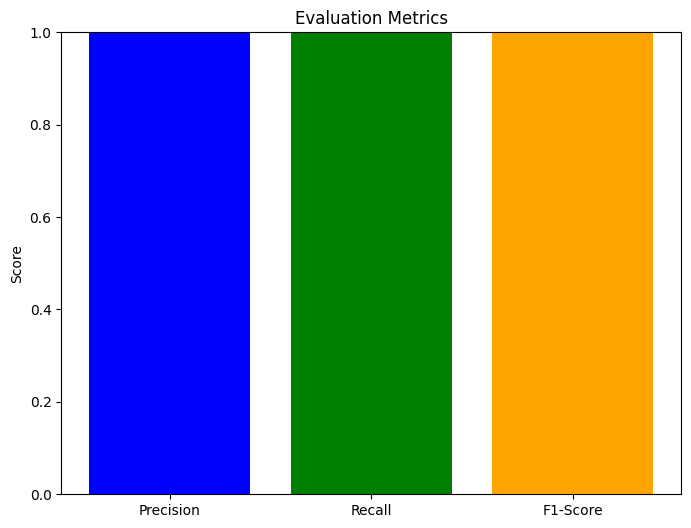

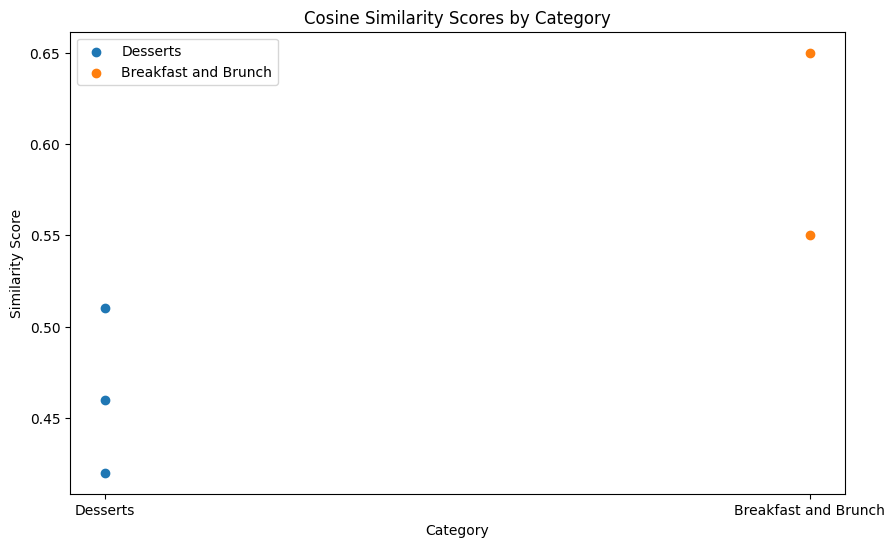

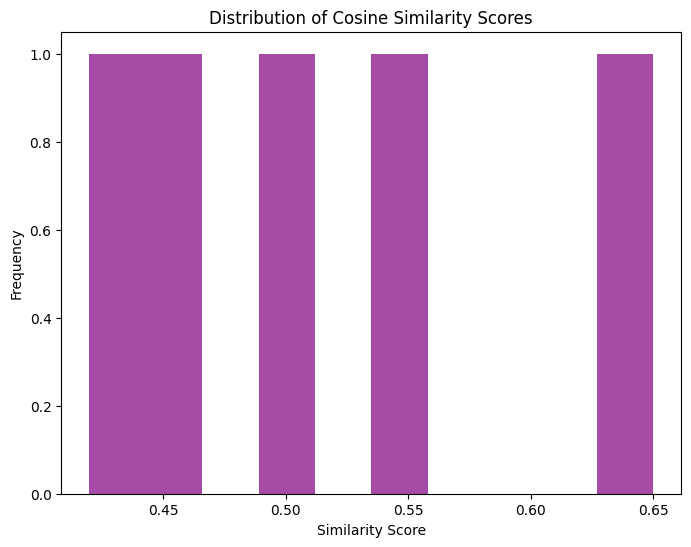

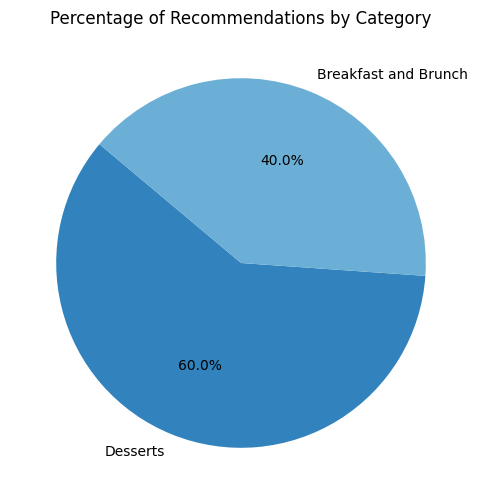

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, classification_report

# Load the data (Replace with your actual file path or DataFrame)
data = pd.DataFrame({
    'Category': ['Desserts', 'Desserts', 'Desserts', 'Breakfast and Brunch', 'Breakfast and Brunch'],
    'Recipe': [
        '3/4 cup white sugar, 3/4 cup whole milk, 1 cup coconut milk, ...',
        '6 eggs, 1 (14 ounce) can sweetened condensed milk, ...',
        '1 egg, 2 cups milk',
        '1 cup all-purpose flour, 1 egg, 2 cups milk',
        '1 cup cooked rice, 1 cup milk, 1 1/4 cups rice flour, ...'
    ],
    'Similarity Score': [0.51, 0.46, 0.42, 0.65, 0.55],
    'Relevant': [1, 0, 0, 1, 1]  # 1 = Relevant, 0 = Not Relevant
})

# Define thresholds for relevance
threshold = 0.5  # Recipes with similarity >= threshold are considered relevant
data['Predicted Relevant'] = (data['Similarity Score'] >= threshold).astype(int)

# Compute evaluation metrics
precision, recall, f1, _ = precision_recall_fscore_support(
    data['Relevant'], data['Predicted Relevant'], average='binary'
)

# Print metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Full classification report
print("\nClassification Report:")
print(classification_report(data['Relevant'], data['Predicted Relevant'], target_names=['Not Relevant', 'Relevant']))

# Data Visualization

# 1. Bar Chart: Precision, Recall, F1-Score
metrics = ['Precision', 'Recall', 'F1-Score']
values = [precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.title("Evaluation Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()

# 2. Scatter Plot: Cosine Similarity Scores by Category
plt.figure(figsize=(10, 6))
for category in data['Category'].unique():
    subset = data[data['Category'] == category]
    plt.scatter(subset['Category'], subset['Similarity Score'], label=category)

plt.title("Cosine Similarity Scores by Category")
plt.ylabel("Similarity Score")
plt.xlabel("Category")
plt.legend()
plt.show()

# 3. Histogram: Distribution of Similarity Scores
plt.figure(figsize=(8, 6))
plt.hist(data['Similarity Score'], bins=10, color='purple', alpha=0.7)
plt.title("Distribution of Cosine Similarity Scores")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.show()

# 4. Pie Chart: Percentage of Recommendations by Category
category_counts = data['Category'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20c.colors)
plt.title("Percentage of Recommendations by Category")
plt.show()


In [9]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_precision_recall_f1(recommended, relevant):
    """
    Calculate Precision, Recall, and F1-Score based on recommended and relevant recipes.

    Parameters:
        recommended (list): List of recommended recipe names.
        relevant (list): List of relevant recipe names.

    Returns:
        dict: Precision, Recall, and F1-Score.
    """
    # Convert to binary values for precision and recall calculation
    y_true = [1 if recipe in relevant else 0 for recipe in recommended]
    y_pred = [1 if recipe in relevant else 0 for recipe in recommended]
    
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    return {
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

def calculate_mean_cosine_similarity(recommendations):
    """
    Calculate the mean cosine similarity score for the recommended recipes.

    Parameters:
        recommendations (list): List of tuples with recipe names and their cosine similarity scores.

    Returns:
        float: Mean cosine similarity score.
    """
    similarities = [score for _, score in recommendations]
    mean_cosine_similarity = np.mean(similarities)
    
    return mean_cosine_similarity

def calculate_top_n_precision(recommendations, relevant, N=5):
    """
    Calculate Top-N Precision for the recommended recipes.

    Parameters:
        recommendations (list): List of tuples with recipe names and their cosine similarity scores.
        relevant (list): List of relevant recipe names.
        N (int): Number of top recommendations to consider.

    Returns:
        float: Top-N Precision.
    """
    # Get the top N recommended recipes based on cosine similarity scores
    top_n_recommended = [recipe for recipe, _ in sorted(recommendations, key=lambda x: x[1], reverse=True)[:N]]
    
    # Calculate precision for top N
    top_n_precision = len(set(top_n_recommended) & set(relevant)) / N
    return top_n_precision

# Sample data
recommendations = [
    ("Recipe1", 0.51),
    ("Recipe2", 0.46),
    ("Recipe3", 0.45),
    ("Recipe4", 0.42),
    ("Recipe5", 0.40)
]

relevant = ["Recipe1", "Recipe2", "Recipe3", "Recipe6", "Recipe7"]

# Calculate Mean Cosine Similarity
mean_cosine_similarity = calculate_mean_cosine_similarity(recommendations)
print(f"Mean Cosine Similarity: {mean_cosine_similarity}")

# Calculate Precision, Recall, and F1-Score
precision_recall_f1 = calculate_precision_recall_f1([recipe for recipe, _ in recommendations], relevant)
print(f"Precision: {precision_recall_f1['precision']}")
print(f"Recall: {precision_recall_f1['recall']}")
print(f"F1-Score: {precision_recall_f1['f1_score']}")

# Calculate Top-N Precision
top_n_precision = calculate_top_n_precision(recommendations, relevant, N=3)
print(f"Top-3 Precision: {top_n_precision}")


Mean Cosine Similarity: 0.44799999999999995
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Top-3 Precision: 1.0
